# EDA on Cuisine Dataset

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [108]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

## Load the data

In [109]:
data=pd.read_csv("Cuisine_rating.csv")
data.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [110]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 111.1 KB


In [111]:
data.nunique()

User ID           200
Area code          65
Location           10
Gender              2
YOB                46
Marital Status      3
Activity            2
Budget              5
Cuisines            7
Alcohol             3
Smoker              3
Food Rating         5
Service Rating      5
Overall Rating      9
Often A S           2
dtype: int64

In [112]:
data.drop("User ID",axis=1,inplace=True)

In [113]:
data.isna().sum()

Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

In [114]:
data.describe()

,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


## EDA

In [115]:
data

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


## Year vs Budget

In [116]:
data.groupby("Gender").agg(Budget_Mean=("Budget","mean"),Budget_Count=("Budget","count"))

,Budget_Mean,Budget_Count
Gender,,
Female,3.963415,82
Male,3.711864,118


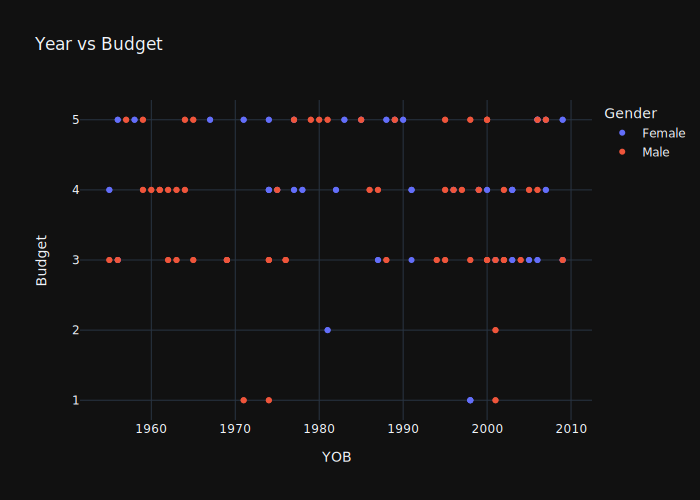

In [117]:
fig=px.scatter(data_frame=data,x="YOB",y="Budget",color="Gender",title="Year vs Budget")
fig.show(renderer="svg")

## Most Visited Cuisine

In [118]:
temp=data.groupby(["Cuisines"],as_index=False).agg(Restaurent=("Cuisines","count"))
temp

,Cuisines,Restaurent
0,Chinese,24
1,Filipino,34
2,French,34
3,Indian,32
4,Italian,18
5,Japanese,36
6,Seafood,22


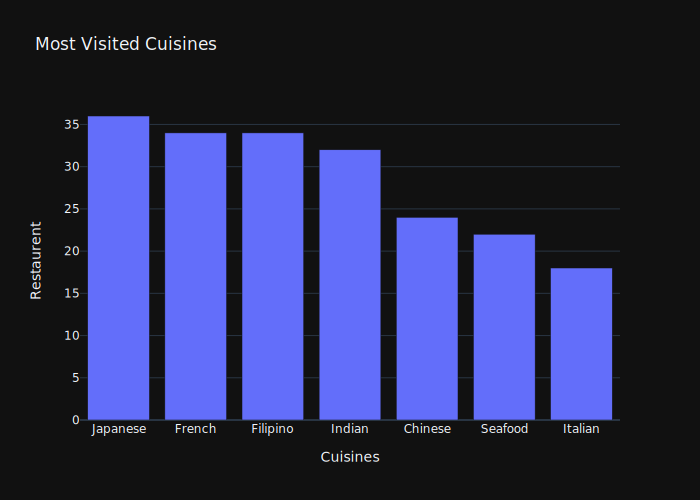

In [119]:
fig=px.bar(data_frame=temp,x="Cuisines",y="Restaurent",title="Most Visited Cuisines")
fig.update_xaxes(categoryorder="total descending")
fig.show(renderer="svg")

Most people go to Japanese Restaurent

## Most expensive cuisine

In [120]:
temp=data.groupby("Cuisines",as_index=False).agg(Average_Price=("Budget","mean"))
temp

,Cuisines,Average_Price
0,Chinese,4.083333
1,Filipino,3.705882
2,French,3.941176
3,Indian,3.406250
4,Italian,3.888889
5,Japanese,4.111111
6,Seafood,3.545455


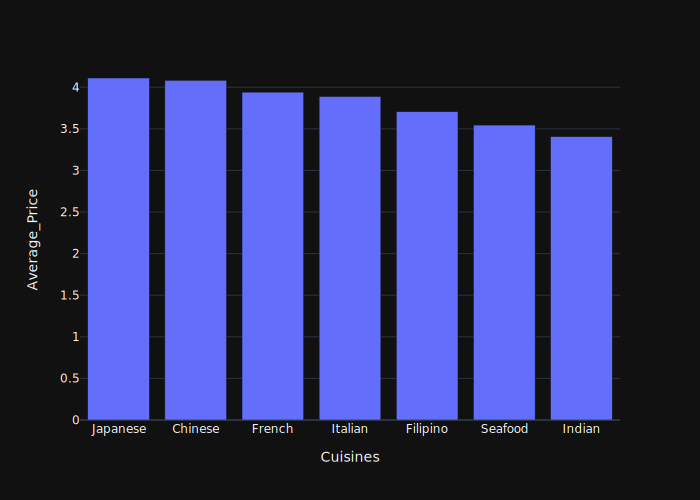

In [121]:
fig=px.bar(data_frame=temp,x="Cuisines",y="Average_Price")
fig.update_xaxes(categoryorder="total descending")
fig.show(renderer="svg")

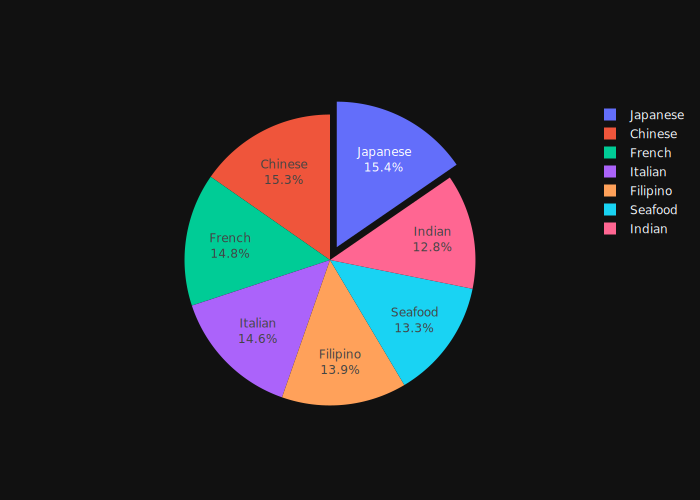

In [122]:
fig=go.Figure()
fig.add_trace(go.Pie(labels=temp["Cuisines"],values=temp["Average_Price"],textinfo="label+percent",pull=[0,0,0,0,0,0.1]))
fig.show(renderer="svg")

Japanese Cuisine is most expensive

## Ratings per Restaurent

In [123]:
temp=data.groupby(["Cuisines"],as_index=False).agg(Average_Food=("Food Rating","mean"),Average_Service=("Service Rating","mean"))
temp

,Cuisines,Average_Food,Average_Service
0,Chinese,3.458333,3.083333
1,Filipino,2.705882,3.382353
2,French,3.294118,2.911765
3,Indian,2.781250,3.562500
4,Italian,3.222222,3.166667
5,Japanese,3.861111,3.333333
6,Seafood,3.227273,3.045455


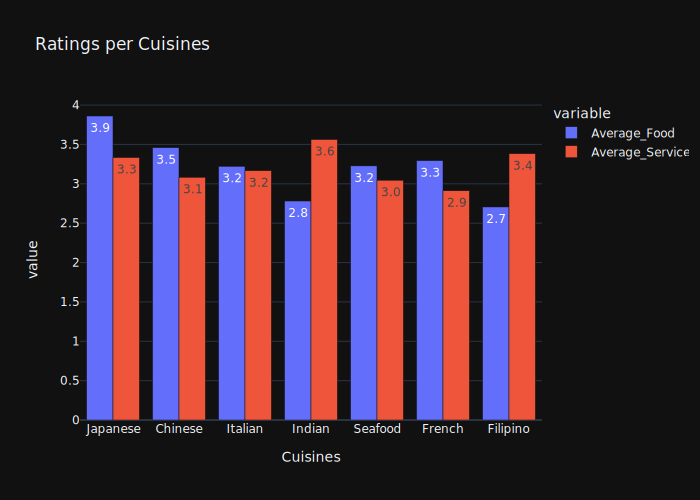

In [124]:
fig=px.bar(data_frame=temp,x="Cuisines",y=["Average_Food","Average_Service"],barmode="group",title="Ratings per Cuisines",text_auto=".2s")
fig.update_xaxes(categoryorder="total descending")
fig.show(renderer="svg")

From this Japanese cuisines have highest food review
and Indian cuisines have highest service review

In [125]:
temp=data.groupby(["Activity","Cuisines"],as_index=False).agg(Cuisines_Count=("Cuisines","count"))
temp

,Activity,Cuisines,Cuisines_Count
0,Professional,Chinese,8
1,Professional,Filipino,14
2,Professional,French,16
3,Professional,Indian,18
4,Professional,Italian,6
5,Professional,Japanese,12
6,Professional,Seafood,6
7,Student,Chinese,16
8,Student,Filipino,20
9,Student,French,18


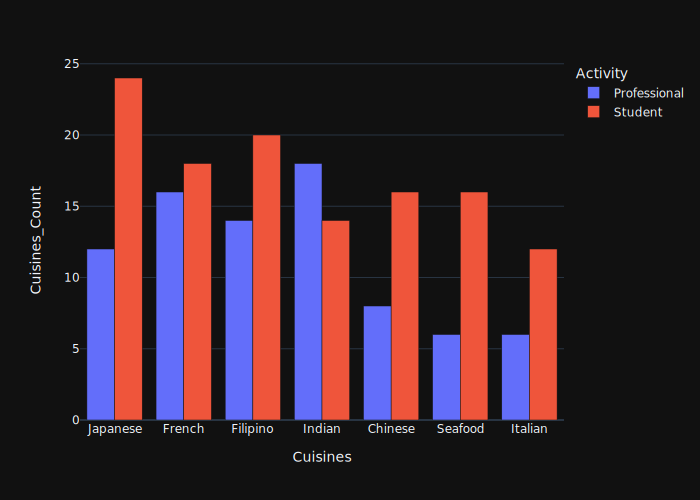

In [126]:
fig=px.bar(data_frame=temp,x="Cuisines",y="Cuisines_Count",color="Activity",barmode="group")
fig.update_xaxes(categoryorder="total descending")
fig.show(renderer="svg")

Most student goes to Japanese Cuisines
Most professional goes to Indian Cuisines

In [127]:
temp=data.groupby(["Alcohol ","Cuisines"],as_index=False).agg(Cuisines_Count=("Cuisines","count"))
temp

,Alcohol,Cuisines,Cuisines_Count
0,Never,Chinese,12
1,Never,Filipino,8
2,Never,French,19
3,Never,Indian,15
4,Never,Italian,6
5,Never,Japanese,20
6,Never,Seafood,8
7,Often,Chinese,8
8,Often,Filipino,14
9,Often,French,10


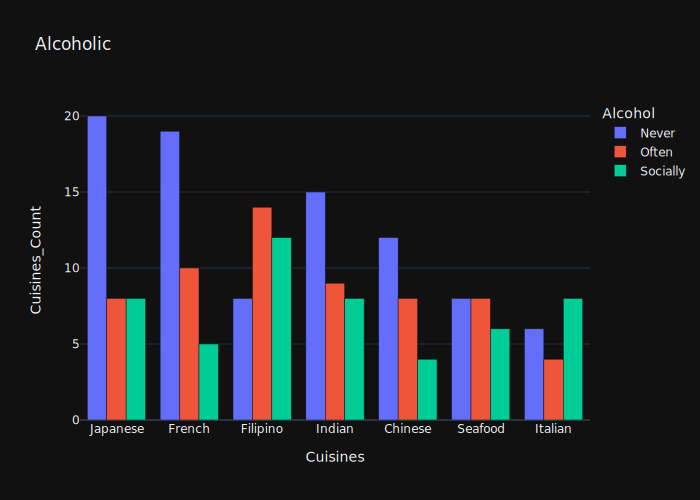

In [128]:
fig=px.bar(data_frame=temp,x="Cuisines",y="Cuisines_Count",color="Alcohol ",barmode="group",title="Alcoholic")
fig.update_xaxes(categoryorder="total descending")
fig.show(renderer="svg")

Most Japanese people are Non Alcoholic

In [129]:
temp=data.groupby(["Marital Status","Cuisines"],as_index=False).agg(Cuisines_Count=("Cuisines","count"))
temp

,Marital Status,Cuisines,Cuisines_Count
0,Divorced,Chinese,2
1,Divorced,French,2
2,Divorced,Indian,2
3,Divorced,Italian,2
4,Divorced,Japanese,4
5,Divorced,Seafood,2
6,Married,Chinese,12
7,Married,Filipino,10
8,Married,French,20
9,Married,Indian,18


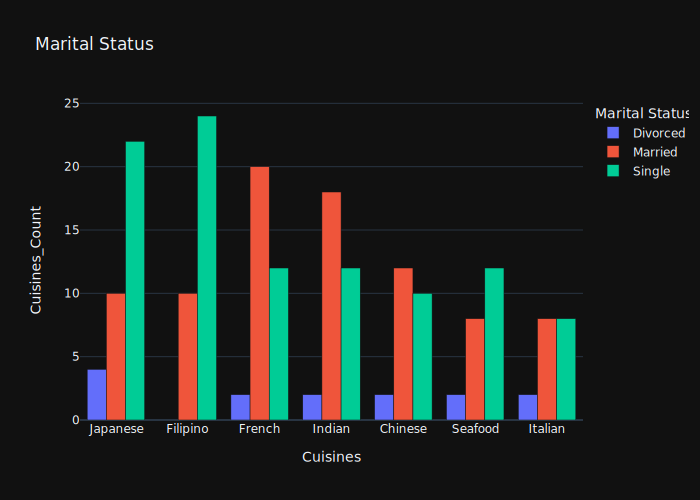

In [130]:
fig=px.bar(data_frame=temp,x="Cuisines",y="Cuisines_Count",color="Marital Status",barmode="group",title="Marital Status")
fig.update_xaxes(categoryorder="total descending")
fig.show(renderer="svg")

Many single people goes to Filipino

In [131]:
temp=data.groupby(["Cuisines","Often A S"],as_index=False).agg(Freq=("Often A S","count"))
temp

,Cuisines,Often A S,Freq
0,Chinese,No,20
1,Chinese,Yes,4
2,Filipino,No,32
3,Filipino,Yes,2
4,French,No,30
5,French,Yes,4
6,Indian,No,28
7,Indian,Yes,4
8,Italian,No,18
9,Japanese,No,28


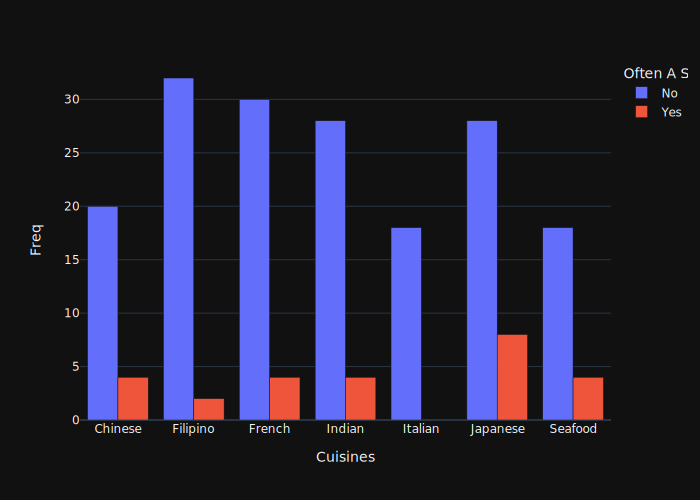

In [132]:
fig=px.bar(data_frame=temp,x="Cuisines",y="Freq",color="Often A S",barmode="group")
fig.show(renderer="svg")

Most repeatedly visited restaurent are Japanese

In [133]:
data["Activity"]=data["Activity"].map({"Professional":1,"Student":0})

In [134]:
data["Activity"]

0      1
1      0
2      0
3      1
4      0
      ..
195    1
196    0
197    1
198    0
199    0
Name: Activity, Length: 200, dtype: int64

In [135]:
temp=data.groupby(["Cuisines"],as_index=False).agg(Probability_of_Professional=("Activity","mean"))
temp

,Cuisines,Probability_of_Professional
0,Chinese,0.333333
1,Filipino,0.411765
2,French,0.470588
3,Indian,0.562500
4,Italian,0.333333
5,Japanese,0.333333
6,Seafood,0.272727


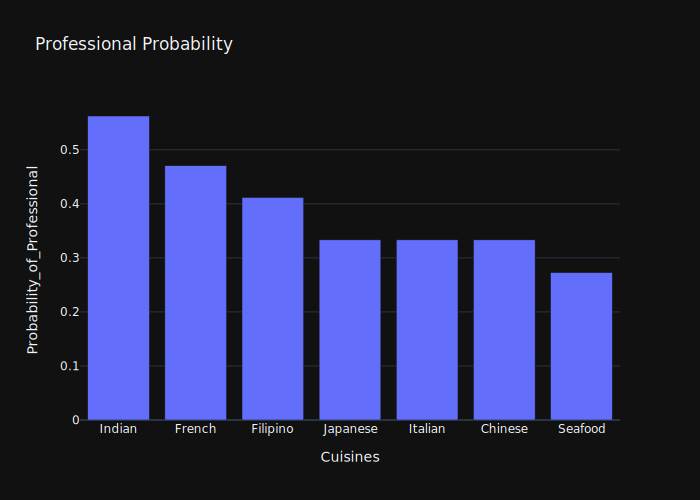

In [136]:
fig=px.bar(data_frame=temp,x="Cuisines",y="Probability_of_Professional",title="Professional Probability")
fig.update_xaxes(categoryorder="total descending")
fig.show(renderer="svg")

Most professionals dont go to Seafood